# 2018 Midterm Election 


In [3]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
%matplotlib inline
warnings.filterwarnings("ignore")

## Exploring Arizona.....Alaska results not yet in.


First we slice the Arizona counties from the dataset and merge the contextual data with the election results for Governer. 

In [16]:
df1 = pd.read_csv('election/raw/ArizGov.csv')
df1 = df1.dropna(axis=0).loc[:14]
df = pd.read_csv('t.csv')
df = df.loc[df.state =='Arizona']
df.head()


,state,county,fips,trump16,clinton16,otherpres16,romney12,obama12,otherpres12,demsen16,...,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc
67,Arizona,Apache,4001,8240,17083,2338,8250,17147,451,34.0,...,45.854643,13.322091,32460.0,15.807433,21.758252,88.941063,8.916757,76.962575,74.061076,6.0
68,Arizona,Cochise,4003,28092,17450,4473,29497,18546,960,10.0,...,37.902276,19.756275,45383.0,8.567108,13.409171,76.837055,6.990228,71.479147,36.301067,3.0
69,Arizona,Coconino,4005,21108,32404,6272,21220,29257,1254,17.0,...,48.946141,10.873943,51106.0,8.238305,11.085381,65.791439,4.446753,53.174026,31.466066,3.0
70,Arizona,Gila,4007,14182,7003,15512,13455,7697,376,21.0,...,32.238290,26.397638,40593.0,12.129932,15.729958,82.262624,10.963115,78.476288,41.062000,4.0
71,Arizona,Graham,4009,8025,3301,8980,8076,3609,170,17.0,...,46.393456,12.315809,47422.0,14.424104,14.580797,86.675944,6.920333,80.435989,46.437399,7.0


In [17]:
ariz = df.merge(df1)
ariz.columns

Index(['state', 'county', 'fips', 'trump16', 'clinton16', 'otherpres16',
       'romney12', 'obama12', 'otherpres12', 'demsen16', 'repsen16',
       'othersen16', 'demhouse16', 'rephouse16', 'otherhouse16', 'demgov16',
       'repgov16', 'othergov16', 'repgov14', 'demgov14', 'othergov14',
       'total_population', 'cvap', 'white_pct', 'black_pct', 'hispanic_pct',
       'nonwhite_pct', 'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'ruralurban_cc', 'race name', 'candidate', 'votes',
       'demvote'],
      dtype='object')

In [13]:
ariz.shape

(13, 43)

In [38]:
ariz.head(50)

,state,county,fips,trump16,clinton16,otherpres16,romney12,obama12,otherpres12,demsen16,...,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,race name,candidate,votes,demvote
0,Arizona,Apache,4001,8240,17083,2338,8250,17147,451,34.0,...,21.758252,88.941063,8.916757,76.962575,74.061076,6.0,Governor,"Garcia, David (DEM)","14,805",1.0
1,Arizona,Cochise,4003,28092,17450,4473,29497,18546,960,10.0,...,13.409171,76.837055,6.990228,71.479147,36.301067,3.0,Governor,"Ducey, Doug (REP)","28,805",0.0
2,Arizona,Coconino,4005,21108,32404,6272,21220,29257,1254,17.0,...,11.085381,65.791439,4.446753,53.174026,31.466066,3.0,Governor,"Garcia, David (DEM)","24,853",1.0
3,Arizona,Gila,4007,14182,7003,15512,13455,7697,376,21.0,...,15.729958,82.262624,10.963115,78.476288,41.062000,4.0,Governor,"Ducey, Doug (REP)","14,059",0.0
4,Arizona,Graham,4009,8025,3301,8980,8076,3609,170,17.0,...,14.580797,86.675944,6.920333,80.435989,46.437399,7.0,Governor,"Ducey, Doug (REP)","7,776",0.0
5,Arizona,Greenlee,4011,1892,1092,2208,1592,1310,72,8.0,...,12.144837,87.803188,9.112072,83.239109,46.568686,7.0,Governor,"Ducey, Doug (REP)","1,637",0.0
6,Arizona,Maricopa,4013,747361,702907,117566,749885,602288,24385,43.0,...,13.051927,69.031137,5.094062,62.882600,2.363800,1.0,Governor,"Ducey, Doug (REP)","624,597",0.0
7,Arizona,Mohave,4015,58282,17455,4206,49168,19533,1309,13.0,...,16.145850,88.121178,13.354677,87.804586,22.963644,3.0,Governor,"Ducey, Doug (REP)","51,808",0.0
8,Arizona,Navajo,4017,20577,16459,3258,19884,16945,506,11.0,...,18.494087,85.507970,9.152769,77.159087,54.138242,4.0,Governor,"Ducey, Doug (REP)","19,696",0.0
9,Arizona,Pima,4019,167428,224661,29551,174779,201251,6220,19.0,...,12.252238,69.199391,5.250122,61.120335,7.523491,2.0,Governor,"Garcia, David (DEM)","159,160",1.0


In [19]:
ariz[['county', 'demvote']].groupby('county').agg('mean')

,demvote
county,
Apache,1.0
Cochise,0.0
Coconino,1.0
Gila,0.0
Graham,0.0
Greenlee,0.0
Maricopa,0.0
Mohave,0.0
Navajo,0.0


# Visualizing the counties 
Governer Party Affiliation by median hh income

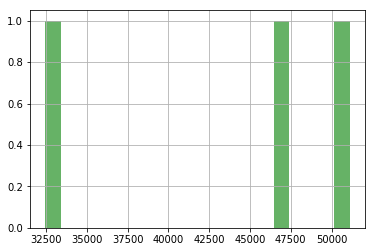

In [82]:
ariz.loc[(ariz.demvote==1), 'median_hh_inc'].hist(bins=20, alpha=.6, color='green')




In [ ]:
Governer Party Affiliation by rural pct
total_population', 'cvap', 'white_pct', 'black_pct', 'hispanic_pct',
       'nonwhite_pct', 'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'ruralurban_cc', 'race name', 'candidate', 'votes',
       'demvote'],

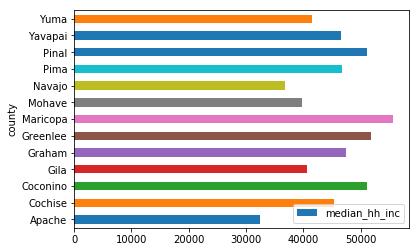

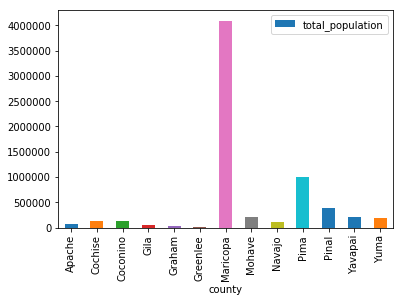

In [162]:
ariz.plot.barh(x='county', y='median_hh_inc')
ariz.plot.bar(x='county', y= 'total_population')


#OUTLIER MARICOPA with large population

## Comparing predictor significance 

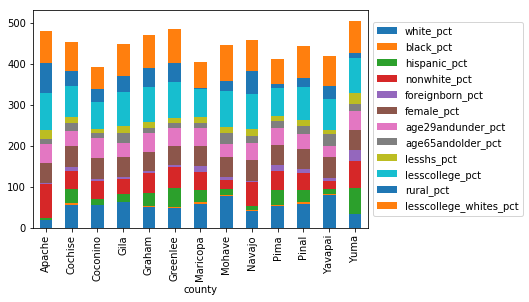

In [161]:
ariz1 = ariz[['county','white_pct', 'black_pct', 'hispanic_pct', 'nonwhite_pct','foreignborn_pct','female_pct','age29andunder_pct','age65andolder_pct','lesshs_pct','lesscollege_pct','rural_pct','lesscollege_whites_pct']]
ariz1.plot(x = 'county',kind='bar', stacked=True, legend=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Changing features around to get a better model

In [179]:


#features = (['lesshs_pct','lesscollege_pct'])
#features = (['median_hh_inc','black_pct',]) #Accuracy:   0.846 Precision:  1.000 Recall:     0.333
features = (['rural_pct','hispanic_pct', 'nonwhite_pct']) #Accuracy:   0.923 Precision:  1.000 Recall:     0.667
#features = (['median_hh_inc','white_pct','black_pct',])#Accuracy:   0.923 Precision:  1.000 Recall:     0.667
valid = ariz[features].notna().all(axis=1)
print(len(df), sum(valid))

15 13


In [180]:
dtree=DecisionTreeClassifier(
    criterion='entropy', 
    random_state=20183333, 
    max_depth=2,
    #min_samples_split=2, 
    #min_samples_leaf=1, 
    #max_features=None, 
    #max_leaf_nodes=None, 
)

dtree.fit(ariz[features], ariz['demvote'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=20183333, splitter='best')

In [181]:
pred_gov = dtree.predict(ariz[features])

print(confusion_matrix(ariz.demvote, pred_gov), '\n')
print('Accuracy:   %0.3f' % accuracy_score(ariz.demvote, pred_gov))
print('Precision:  %0.3f' % precision_score(ariz.demvote, pred_gov))
print('Recall:     %0.3f' % recall_score(ariz.demvote, pred_gov))

[[10  0]
 [ 1  2]] 

Accuracy:   0.923
Precision:  1.000
Recall:     0.667


## The model is overfit
More data would need to be gathered to obtain any useful results

Data to include: 

All counties in the U.S. 
All seats not just Governor
